In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import datashader.transfer_functions as tf
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd
import holoviews as hv
from holoviews.operation.datashader import dynspread
from holoviews.operation.datashader import datashade
import hvplot
import seaborn as sns

In [3]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 14
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)
width, height = plt.rcParams.get('figure.figsize')

In [4]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress

In [5]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [6]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

In [7]:
def mean_vz_from_file(file):
    v_z = fits.open(file)[0].data
    v_z.shape
    v_z = v_z[0:90]
    v_z = np.mean(v_z, axis=0)
    small = np.where(v_z < -6.5)
    v_z[small] = -6.5
    big = np.where(v_z > 6.5)
    v_z[big] = 6.5
    return v_z

<h2>16. 04. 2025.</h2>

In [8]:
cube = fits.open("loc_dyn_32_32_16_series_tumag_l2.fits")[0].data

In [9]:
np.shape(cube)

(31, 768, 768, 9)

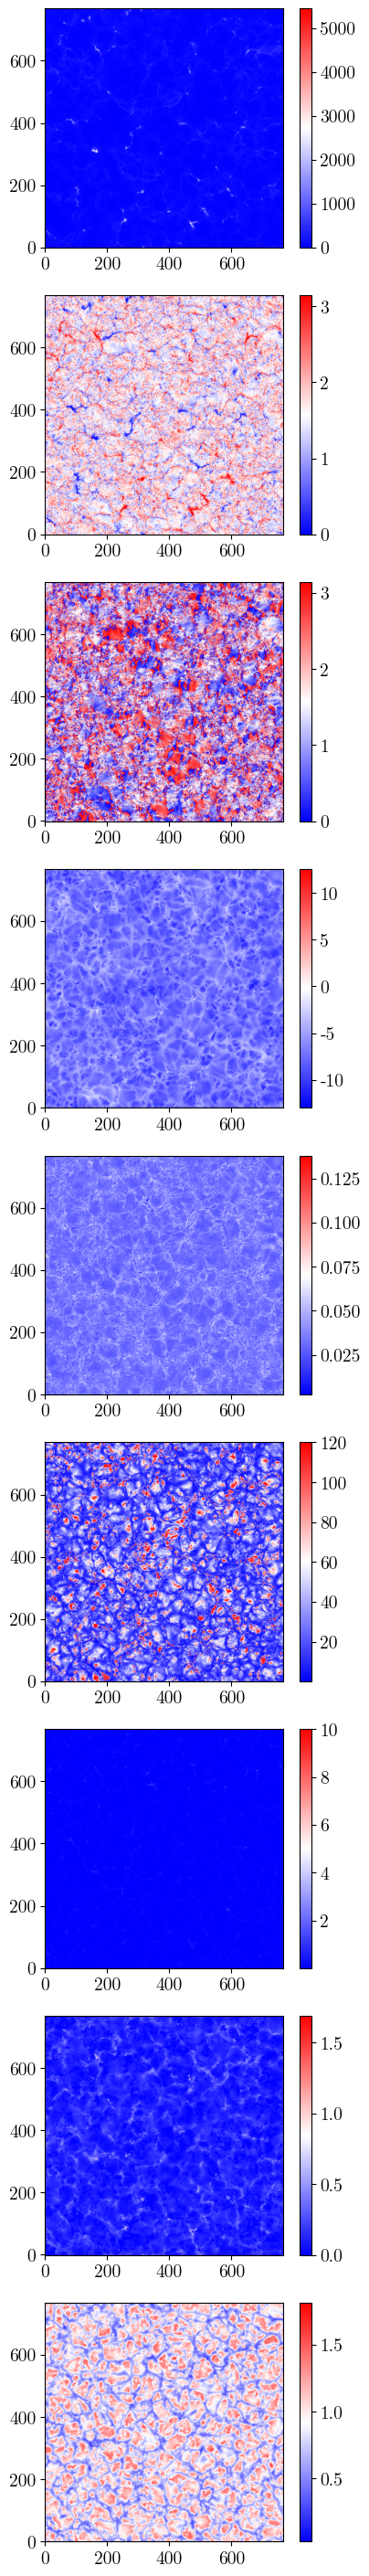

In [10]:
nlevels=9
plt.figure(figsize=(15,4*nlevels))
for i in range(0, nlevels):
    plt.subplot(nlevels,3,1+3*i)
    plt.imshow(cube[1,:,:,i], cmap = 'bwr', origin='lower')
    plt.colorbar()
plt.show()

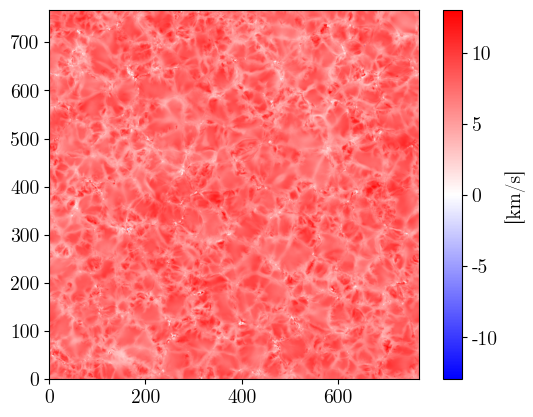

In [11]:
plt.imshow(-cube[0,:,:,3], origin = "lower", cmap = "bwr")
plt.colorbar(label = "[km/s]")

In [12]:
Vz = -cube[:,:,:,3]
print(np.shape(Vz))
'''
small = np.where(Vz < -8.5)
Vz[small] = -8.5
big = np.where(Vz > 8.5)
Vz[big] = 8.5
'''
Vz_mean = temporal_avg(Vz, 0, 90)
print(np.shape(Vz_mean))



(31, 768, 768)
(768, 768)


In [13]:
Vxm1 = fits.open("Velocities_TAU_0_100.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_100.fits")[0].data # Vx from Velocities.fits as originally thought
Vzm1 = fits.open("Velocities_TAU_0_100.fits")[2].data
Vxm1 = Vxm1[::3,::2,::2]/1E5
Vym1 = Vym1[::3,::2,::2]/1E5
Vzm1 = Vzm1[::3,::2,::2]/1E5
Vxm1 = Vxm1.transpose(0, 2, 1)
Vym1 = Vym1.transpose(0, 2, 1)
Vzm1 = Vzm1.transpose(0, 2, 1)

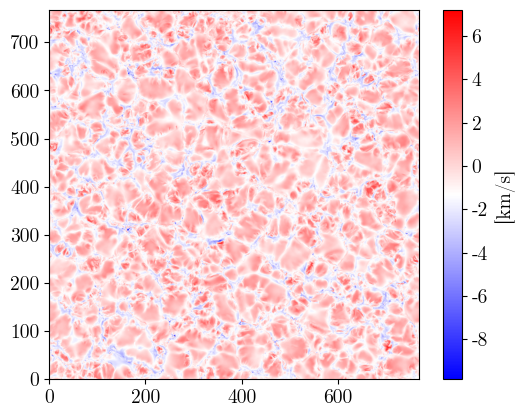

In [14]:
plt.imshow(Vzm1[0], origin = "lower", cmap = "bwr")
plt.colorbar(label = "[km/s]")

In [15]:
Vzm2 = fits.open("Velocities_TAU_0_010.fits")[2].data
Vzm2 = Vzm2[::3,::2,::2]/1E5
Vzm2 = Vzm2.transpose(0, 2, 1)

In [16]:
Vzm3 = fits.open("Velocities_TAU_0_001.fits")[2].data
Vzm3 = Vzm3[::3,::2,::2]/1E5
Vzm3 = Vzm3.transpose(0, 2, 1)

In [17]:
Vzm4 = fits.open("Velocities_TAU_0_0001.fits")[2].data
Vzm4 = Vzm4[::3,::2,::2]/1E5
Vzm4 = Vzm4.transpose(0, 2, 1)

In [18]:
Vzm1_mean = temporal_avg(Vzm1, 0, 90)
Vzm2_mean = temporal_avg(Vzm2, 0, 90)
Vzm3_mean = temporal_avg(Vzm3, 0, 90)
Vzm4_mean = temporal_avg(Vzm4, 0, 90)

In [19]:
Vzm1_filtered600 = gaussian_filter(Vzm1_mean, 22.5/2, mode = "wrap")
Vzm2_filtered600 = gaussian_filter(Vzm2_mean, 22.5/2, mode = "wrap")
Vzm3_filtered600 = gaussian_filter(Vzm3_mean, 22.5/2, mode = "wrap")
Vzm4_filtered600 = gaussian_filter(Vzm4_mean, 22.5/2, mode = "wrap")

In [20]:
Vzm1_filtered300 = gaussian_filter(Vzm1_mean, 11.25/2, mode = "wrap")
Vzm2_filtered300 = gaussian_filter(Vzm2_mean, 11.25/2, mode = "wrap")
Vzm3_filtered300 = gaussian_filter(Vzm3_mean, 11.25/2, mode = "wrap")
Vzm4_filtered300 = gaussian_filter(Vzm4_mean, 11.25/2, mode = "wrap")

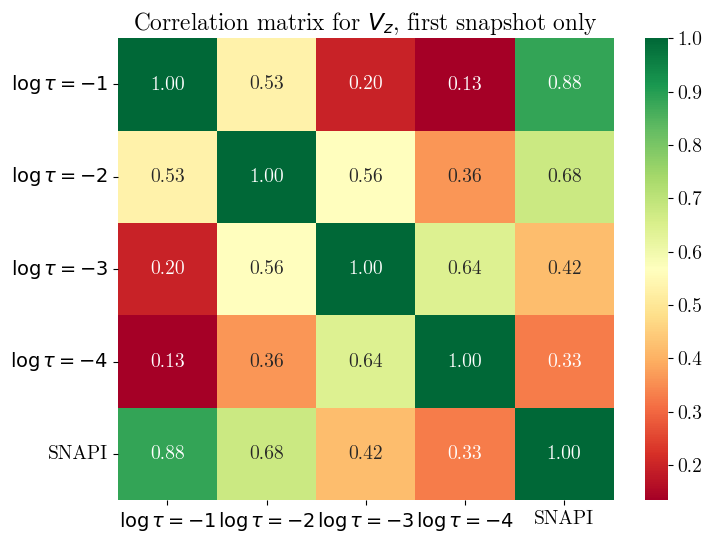

In [21]:
correlation_matrix = np.corrcoef([Vzm1[0,:,:].ravel(), Vzm2[0,:,:].ravel(),
                     Vzm3[0,:,:].ravel(), Vzm4[0,:,:].ravel(), 
                     -cube[0,:,:,3].ravel()]) 

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn',
            xticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'SNAPI'],
            yticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'SNAPI'])
plt.title('Correlation matrix for $V_z$, first snapshot only')
plt.savefig("VZ1SNAP.png", dpi = 70)
plt.show()

<h3>Temporal averaging</h3>

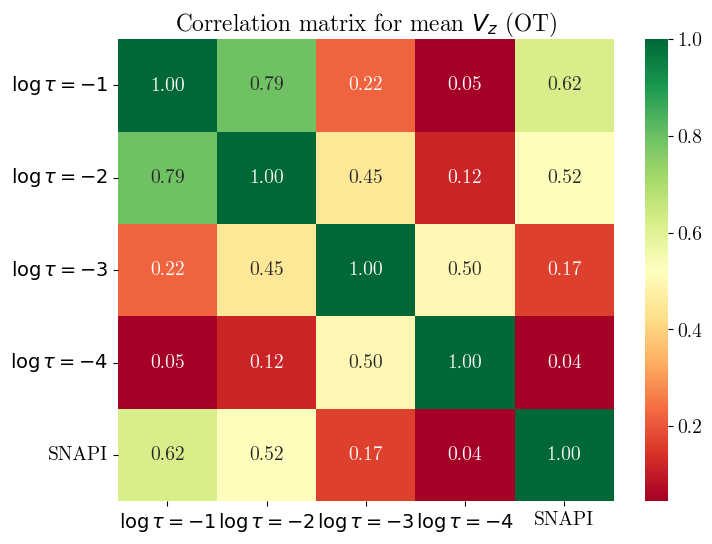

In [22]:
correlation_matrix = np.corrcoef([Vzm1_mean[:,:].ravel(), Vzm2_mean[:,:].ravel(),
                     Vzm3_mean[:,:].ravel(), Vzm4_mean[:,:].ravel(), 
                     Vz_mean.ravel()]) 

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn',
            xticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'SNAPI'],
            yticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'SNAPI'])
plt.title('Correlation matrix for mean $V_z$ (OT)')
plt.savefig("VZ1SNAP.png", dpi = 70)
plt.show()

<h3>OTC</h3>

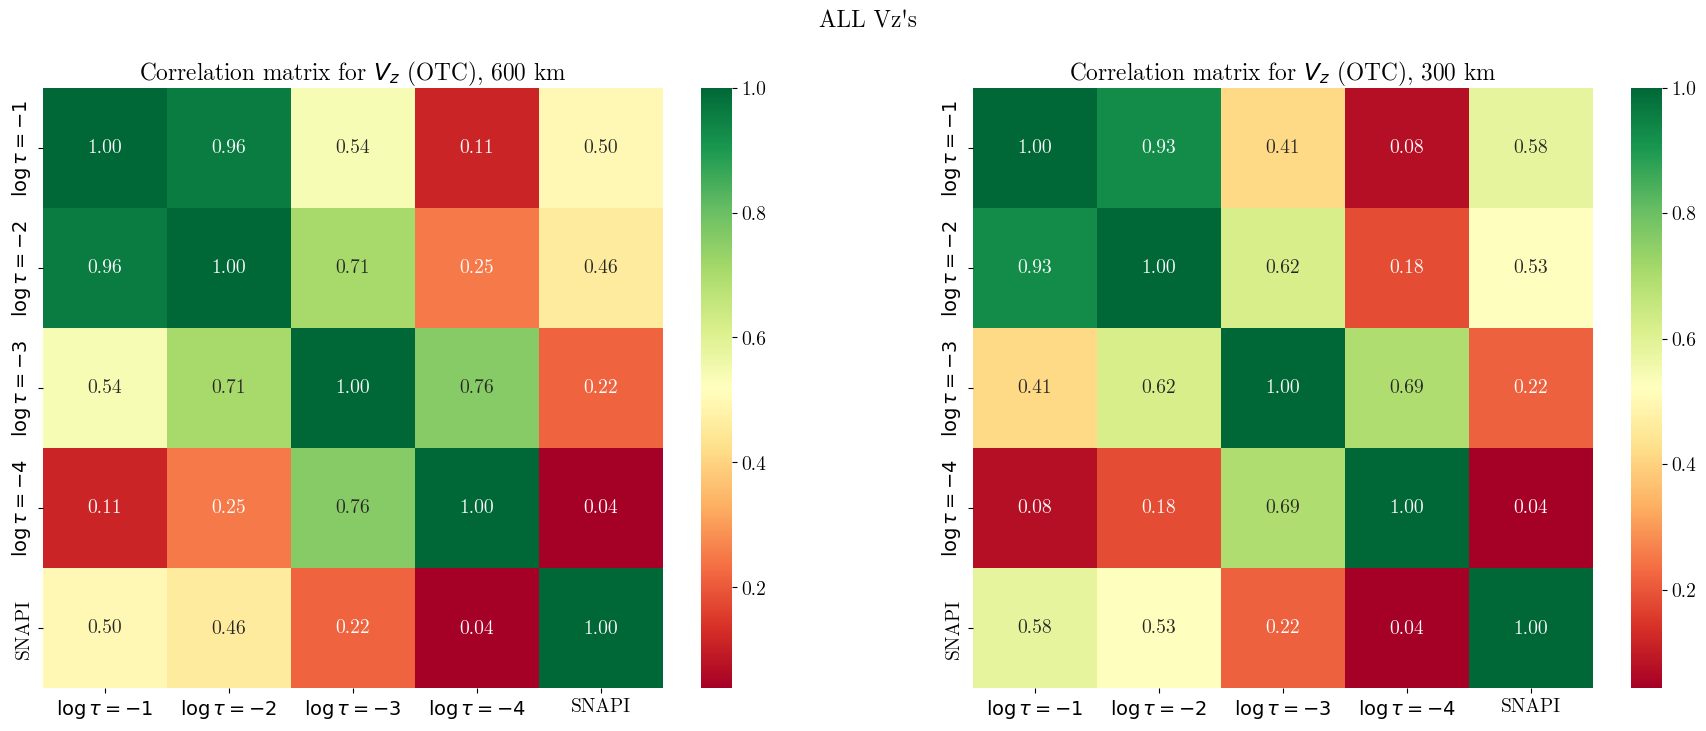

In [23]:
correlation_matrix = np.corrcoef([Vzm1_filtered600[:,:].ravel(), Vzm2_filtered600[:,:].ravel(),
                     Vzm3_filtered600[:,:].ravel(), Vzm4_filtered600[:,:].ravel(), 
                     Vz_mean.ravel()]) 

fig = plt.figure(figsize = (22,7.8))
fig.suptitle("ALL Vz\'s")
ax1 = fig.add_subplot(121)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn',
            xticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'SNAPI'],
            yticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'SNAPI'])
plt.title('Correlation matrix for $V_z$ (OTC), 600 km')

correlation_matrix = np.corrcoef([Vzm1_filtered300[:,:].ravel(), Vzm2_filtered300[:,:].ravel(),
                     Vzm3_filtered300[:,:].ravel(), Vzm4_filtered300[:,:].ravel(), 
                     Vz_mean.ravel()]) 

ax2 = fig.add_subplot(122)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn',
            xticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'SNAPI'],
            yticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'SNAPI'])
plt.title('Correlation matrix for $V_z$ (OTC), 300 km')


plt.savefig("VZ_timeConv.png", dpi = 70)
plt.show()